In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

titanic_train = pd.read_csv('./train.csv',usecols=["PassengerId","Survived","Sex","Age","Pclass","Fare","Embarked"], engine="python")
titanic_train["Age"] = titanic_train["Age"].fillna(30) 
titanic_train["Sex"] = np.where(titanic_train["Sex"] == "male", 0, 1)
# muž = 0, žena = 1
titanic_train["Embarked"] = labelencoder.fit_transform(titanic_train["Embarked"].values)
# Labelencoder zakódoval hodnoty do integeru

titanic_train


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,0,22.0,7.2500,2
1,2,1,1,1,38.0,71.2833,0
2,3,1,3,1,26.0,7.9250,2
3,4,1,1,1,35.0,53.1000,2
4,5,0,3,0,35.0,8.0500,2
...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000,2
887,888,1,1,1,19.0,30.0000,2
888,889,0,3,1,30.0,23.4500,2
889,890,1,1,0,26.0,30.0000,0


[0.7039106145251397, 0.6983240223463687, 0.7094972067039106, 0.7150837988826816, 0.7206703910614525, 0.7262569832402235, 0.7374301675977654, 0.7094972067039106, 0.7318435754189944, 0.7206703910614525, 0.7206703910614525, 0.7206703910614525, 0.7318435754189944, 0.7318435754189944, 0.7318435754189944, 0.7206703910614525, 0.7206703910614525, 0.7039106145251397, 0.7150837988826816, 0.7094972067039106, 0.7262569832402235, 0.7094972067039106, 0.7206703910614525, 0.7094972067039106, 0.7374301675977654, 0.7150837988826816, 0.7150837988826816, 0.7039106145251397, 0.7150837988826816, 0.7039106145251397, 0.6983240223463687, 0.6871508379888268, 0.6983240223463687, 0.6927374301675978, 0.6927374301675978, 0.6927374301675978, 0.7039106145251397]


<Axes: >

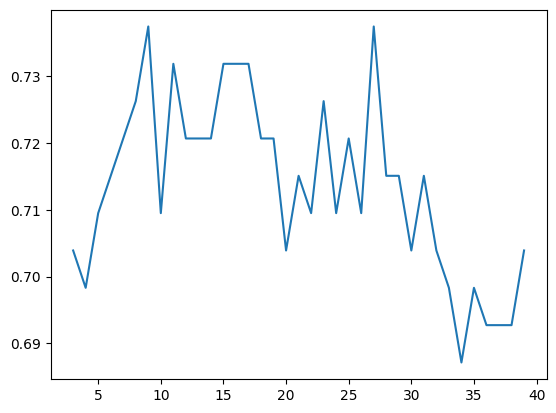

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x = np.array(titanic_train[["Pclass", "Sex", "Age","Pclass", "Fare","Embarked"]]).reshape((-1, 6))
y = np.array(titanic_train["Survived"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Srovnám chybovost pro počty sousedů od 3 do 40
error = []
for i in range(3,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    error.append(np.mean(model.predict(x_test)==y_test))
    
print(error)

# Zobrazím chybovost na grafu
sns.lineplot(x=range(3,40),y=error)
    

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       134
           1       0.67      0.31      0.43        89

    accuracy                           0.66       223
   macro avg       0.66      0.61      0.59       223
weighted avg       0.66      0.66      0.63       223



<Axes: >

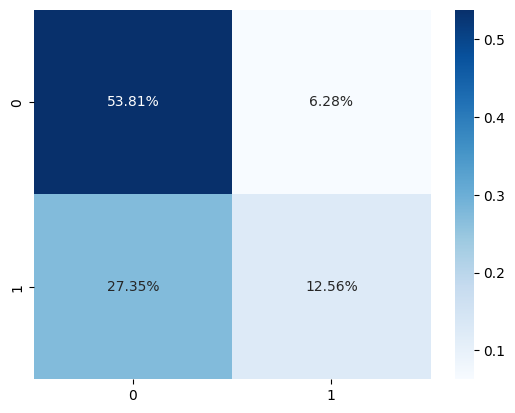

In [5]:
# Nejmenší chybovost je pro 34 sousedů

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Euklidovská metrika

model = KNeighborsClassifier(n_neighbors=34,p=2)
model.fit(x_train,y_train)

print(classification_report(y_test, model.predict(x_test)))

cf_matrix = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues',=["Survived","Died"])

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       134
           1       0.75      0.44      0.55        89

    accuracy                           0.72       223
   macro avg       0.73      0.67      0.67       223
weighted avg       0.72      0.72      0.70       223



<Axes: >

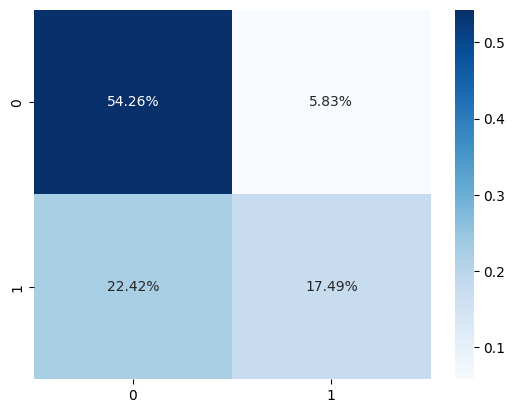

In [6]:
# Manhattanská metrika

model = KNeighborsClassifier(n_neighbors=34, p=1)
model.fit(x_train,y_train)

print(classification_report(y_test, model.predict(x_test)))

cf_matrix = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       134
           1       0.69      0.39      0.50        89

    accuracy                           0.69       223
   macro avg       0.69      0.64      0.64       223
weighted avg       0.69      0.69      0.66       223



<Axes: >

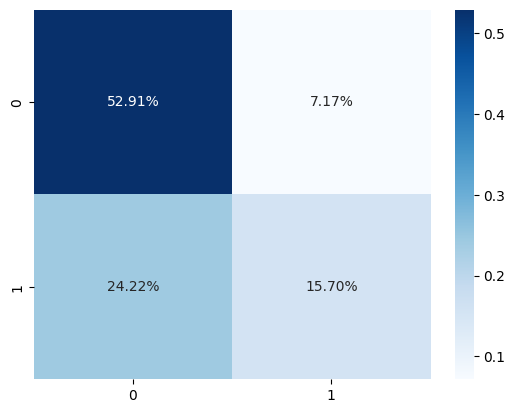

In [7]:
# Výsledky s manhattanskou metrikou jsou o něco lepší
# Zkusím ještě model s počtem sousedů 4, podle grafu měl druhou nejmenší chybovost

# Euklidovská metrika
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train)

print(classification_report(y_test, model.predict(x_test)))

cf_matrix = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

              precision    recall  f1-score   support

           0       0.72      0.91      0.81       134
           1       0.78      0.47      0.59        89

    accuracy                           0.74       223
   macro avg       0.75      0.69      0.70       223
weighted avg       0.74      0.74      0.72       223



<Axes: >

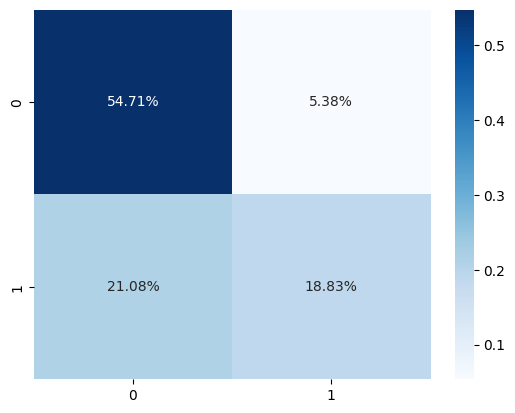

In [8]:
# Manhattanská metrika
model = KNeighborsClassifier(n_neighbors=4, p=1)
model.fit(x_train,y_train)

print(classification_report(y_test, model.predict(x_test)))

cf_matrix = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [9]:
# Pro 4 sousedy je manhattanská metrika nejspíše taky lepší volba